In [9]:

# ignore metric did not predict warning
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, mode
from pathlib import Path
from imblearn.pipeline import Pipeline
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV, cross_val_score, cross_validate, validation_curve
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE  
from sklearn.metrics import log_loss

In [10]:
# Loading data
file_path = Path("../eda/reduced_filtered_df.csv")
df = pd.read_csv(file_path)
df.head(1)

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen,MYOPIC
0,3.702,3.392,15.29,4,1,1.358,8,0


In [11]:
# Define X,y
label = df["MYOPIC"]
X = df.iloc[:,:-1].copy()
len(X)

372

## Training X Variance

In [12]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()


In [13]:
params = {'n_estimators': 5,
 'max_leaves': 4,
 'min_child_weight': 3.5806456485030385,
 'learning_rate': 0.4359086627863047,
 'subsample': 1.0,
 'colsample_bylevel': 0.9122163035553499,
 'colsample_bytree': 0.9599028390069959,
 'reg_alpha': 0.11831815110092216,
 'reg_lambda': 0.07223617575057466
 }

model.set_params(**params)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scoring = ('neg_log_loss','f1', 'recall', 'precision', 'roc_auc', 'accuracy')

In [14]:
def metrics(scores):
    print("LogLoss")
    print(np.mean(scores['test_neg_log_loss']))
    print(np.std(scores['test_neg_log_loss']))
    print("Test Accuracy")
    print(np.mean(scores['test_accuracy']))
    print(np.std(scores['test_accuracy']))
    print("ROC_AUC")
    print(np.mean(scores['test_roc_auc']))
    print(np.std(scores['test_roc_auc']))
    print("Precision")
    print(np.mean(scores['test_precision']))
    print(np.std(scores['test_precision']))

In [15]:
train_split=[]
train_log_loss_mean=[]
train_log_loss_stdev=[]
test_split=[]
test_log_loss_mean=[]
test_log_loss_stdev=[]

In [16]:
# Holdback Method with stratify as True
X_train90, X_test10, y_train90, y_test10 = train_test_split(X, label, random_state=42, stratify=label, train_size=0.9)
print("Rows: ",len(X_train90))

scores = cross_validate(model, X_train90, y_train90, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
train_split.append(90)
train_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
train_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  334
LogLoss
-0.2997235825218076
0.0739989098720805
Test Accuracy
0.8715092097445039
0.0376546676660325
ROC_AUC
0.8442528735632185
0.09608140100441981
Precision
0.5484920634920634
0.31800022541037315


In [17]:
X_train80, X_test11, y_train80, y_test11 = train_test_split(X_train90, y_train90, random_state=42, stratify=y_train90, train_size=0.889)
print("Rows: ",len(X_train80))
scores = cross_validate(model, X_train80, y_train80, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
train_split.append(80)
train_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
train_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))


Rows:  296
LogLoss
-0.29961600362742646
0.07322768406429846
Test Accuracy
0.8808045977011496
0.0500320503258196
ROC_AUC
0.8392008547008547
0.1038687346628929
Precision
0.586111111111111
0.35386970120667127


In [18]:
X_train70, X_test12, y_train70, y_test12 = train_test_split(X_train80, y_train80, random_state=42, stratify=y_train80, train_size=0.875)
print("Rows: ",len(X_train70))
scores = cross_validate(model, X_train70, y_train70, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
train_split.append(70)
train_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
train_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  259
LogLoss
-0.29806663518870075
0.09281697601344444
Test Accuracy
0.8752820512820512
0.04912477906794787
ROC_AUC
0.8480978260869564
0.1198015771374923
Precision
0.5277777777777778
0.4024078761225134


In [19]:
X_train60, X_test14, y_train60, y_test14 = train_test_split(X_train70, y_train70, random_state=42, stratify=y_train70, train_size=0.857)
print("Rows: ",len(X_train60))
scores = cross_validate(model, X_train60, y_train60, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
train_split.append(60)
train_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
train_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  221
LogLoss
-0.2797553090711759
0.06285002901728483
Test Accuracy
0.8731884057971013
0.043165974346751776
ROC_AUC
0.8635891812865496
0.08147944560964503
Precision
0.4527777777777778
0.3724812531532524


In [20]:
X_train50, X_test16, y_train50, y_test16 = train_test_split(X_train60, y_train60, random_state=42, stratify=y_train60, train_size=0.833)
print("Rows: ",len(X_train50))
scores = cross_validate(model, X_train50, y_train50, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
train_split.append(50)
train_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
train_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  184
LogLoss
-0.2768683942107572
0.07075570248425431
Test Accuracy
0.8897660818713449
0.044799227737004496
ROC_AUC
0.8527777777777777
0.12588613375920124
Precision
0.6472222222222221
0.3533459990741772


## Testing Variance

In [21]:
# Holdback Method with stratify as True
X_train51, X_test50, y_train51, y_test50 = train_test_split(X, label, random_state=42, stratify=label, train_size=0.5)
print("Rows: ",len(X_test50))
scores = cross_validate(model, X_test50, y_test50, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
test_split.append(50)
test_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
test_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  186
LogLoss
-0.33574318205545667
0.08997264362119747
Test Accuracy
0.8731968810916179
0.04346464973725452
ROC_AUC
0.7796670751633988
0.1442073617012899
Precision
0.2111111111111111
0.3989182904670275


In [22]:
X_train20, X_test40, y_train20, y_test40 = train_test_split(X_test50, y_test50, random_state=42, stratify=y_test50, test_size=0.8)
print("Rows: ",len(X_test40))
scores = cross_validate(model, X_test40, y_test40, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
test_split.append(60)
test_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
test_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  149
LogLoss
-0.34295371216940906
0.07115107390000122
Test Accuracy
0.863968253968254
0.031121232561551346
ROC_AUC
0.760897435897436
0.14626204946513283
Precision
0.0
0.0


In [23]:
X_train25, X_test30, y_train25, y_test30 = train_test_split(X_test40, y_test40, random_state=42, stratify=y_test40, test_size=0.75)
print("Rows: ",len(X_test30))
scores = cross_validate(model, X_test30, y_test30, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
test_split.append(70)
test_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
test_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  112
LogLoss
-0.31510141144078146
0.07941089818057563
Test Accuracy
0.8757575757575757
0.04110503020075917
ROC_AUC
0.7974074074074075
0.16373962652615448
Precision
0.0
0.0


In [24]:
X_train33, X_test20, y_train33, y_test20 = train_test_split(X_test30, y_test30, random_state=42, stratify=y_test30, test_size=0.666)
print("Rows: ",len(X_test20))
scores = cross_validate(model, X_test20, y_test20, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
test_split.append(80)
test_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
test_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  75
LogLoss
nan
nan
Test Accuracy
nan
nan
ROC_AUC
nan
nan
Precision
nan
nan


In [25]:
X_train49, X_test10, y_train49, y_test10 = train_test_split(X_test20, y_test20, random_state=42, stratify=y_test20, test_size=0.5)
print("Rows: ",len(X_test10))
scores = cross_validate(model, X_test10, y_test10, scoring=scoring, cv=cv, n_jobs=1)
metrics(scores)
test_split.append(90)
test_log_loss_mean.append(np.mean(scores['test_neg_log_loss']))
test_log_loss_stdev.append(np.std(scores['test_neg_log_loss']))

Rows:  38
LogLoss
nan
nan
Test Accuracy
nan
nan
ROC_AUC
nan
nan
Precision
nan
nan


In [26]:
total_stdev = [ v + test_log_loss_stdev[i] for i,v in enumerate(train_log_loss_stdev)]

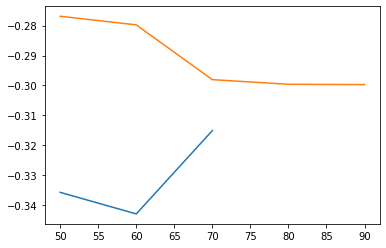

In [27]:
plt.subplot(1,1,1)
plt.plot(test_split, test_log_loss_mean)
plt.plot(train_split, train_log_loss_mean)

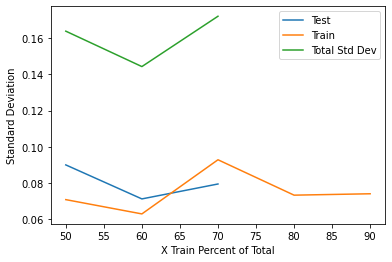

In [28]:
plt.subplot(1,1,1)
plt.plot(test_split, test_log_loss_stdev, label="Test")
plt.plot(train_split, train_log_loss_stdev, label="Train")
plt.plot(test_split, total_stdev, label="Total Std Dev")
plt.xlabel("X Train Percent of Total")
plt.ylabel("Standard Deviation")
plt.legend()

Need a minimum of 150 samples
I will set my preference to be 150 samples or 60/40 train to test.  

This really illustrates that the dataset is too small.  